#Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import time
sns.set()
sns.set_theme(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Loading the Dataset

In [3]:
df = pd.read_csv("/content/credit_card_fraud.csv")

#Checking DataFrame Dimensions

In [4]:
df.shape

(284807, 31)

#DataFrame Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Exploratory Data Analysis (EDA)

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

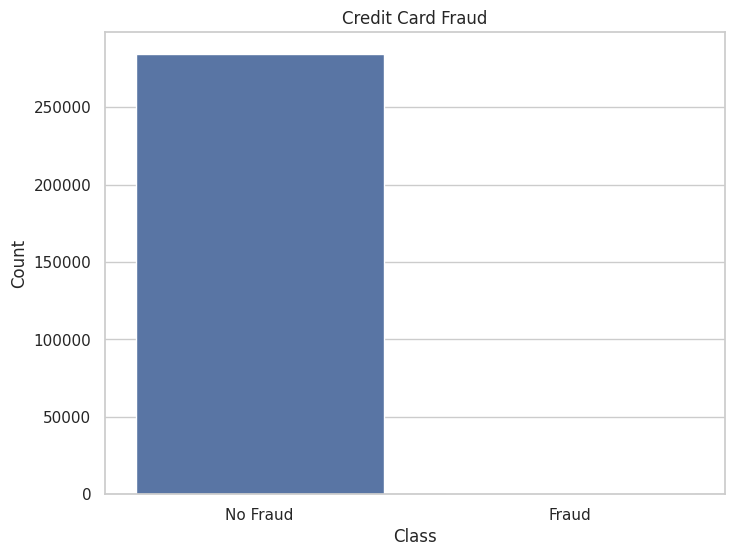

In [10]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x='Class', data=df)
plt.ylabel('Count')
plt.title('Credit Card Fraud')
ax.set_xticklabels(['No Fraud', 'Fraud'])
plt.show()

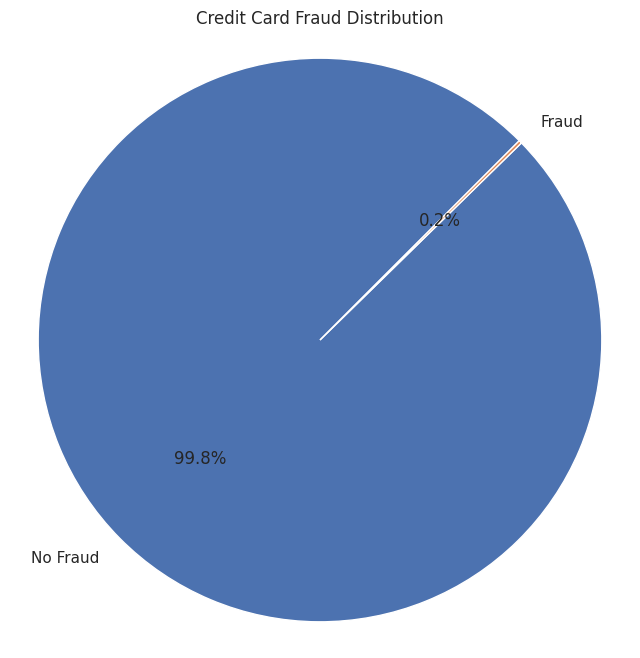

In [15]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=45)
plt.title('Credit Card Fraud Distribution')
plt.axis('equal')

plt.show()

#Feature Scaling, Splitting Data into Training and Testing Sets

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
df['Amount']= sc.fit_transform(df[['Amount']])

In [ ]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Machine Learning Models

##Hyperparameter Tuning and Evaluation of Logistic Regression Model

Best Hyperparameters: {'C': 10, 'max_iter': 500}
Accuracy: 0.9991
AUPRC: 0.4483


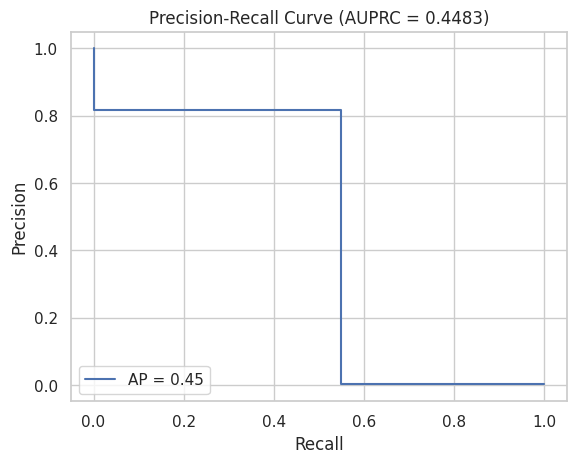

In [ ]:
param_grid = {
    'C': [ 0.1, 1, 10],
    'max_iter': [500,700,1000],
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model_logreg = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")

auprc = average_precision_score(y_test, y_pred)
print(f"AUPRC: {auprc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred)

disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=auprc)
disp.plot()
plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.4f})')
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.55      0.66       113

    accuracy                           1.00     71202
   macro avg       0.91      0.77      0.83     71202
weighted avg       1.00      1.00      1.00     71202



##Hyperparameter Tuning and Evaluation of Random Forest Classifier Model

Best Hyperparameters: {'max_depth': 15, 'n_estimators': 500}
Accuracy: 0.9995
AUPRC: 0.7084


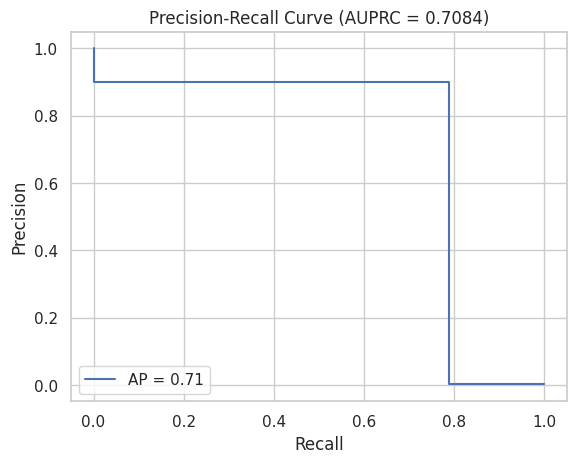

In [ ]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, None],
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(rf, param_grid, scoring='accuracy', cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred2 = best_model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")

auprc = average_precision_score(y_test, y_pred2)
print(f"AUPRC: {auprc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred2)

disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=auprc)
disp.plot()
plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.4f})')
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred2)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.90      0.79      0.84       113

    accuracy                           1.00     71202
   macro avg       0.95      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



##Hyperparameter Tuning and Evaluation of Extra Tree Classifier Model

Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.9995
AUPRC: 0.7129


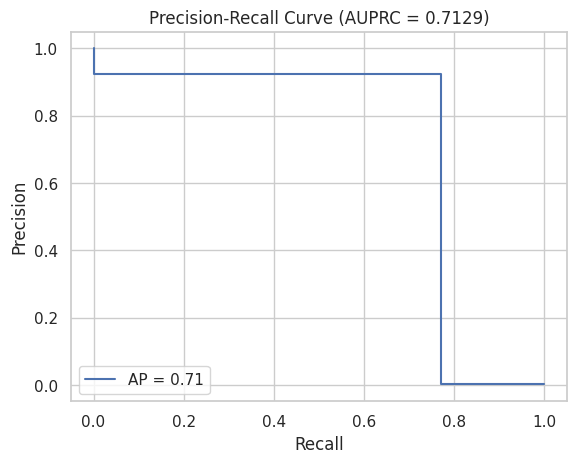

In [ ]:
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [None, 10, 20],
}

model = ExtraTreesClassifier()

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred3 = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")

auprc = average_precision_score(y_test, y_pred3)
print(f"AUPRC: {auprc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred3)

disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=auprc)
disp.plot()
plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.4f})')
plt.show()

In [ ]:
classification_rep = classification_report(y_test,y_pred3)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.77      0.84       113

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



##Training and Evaluation of Voting Classifier Model

Accuracy: 0.9995
AUPRC: 0.6678


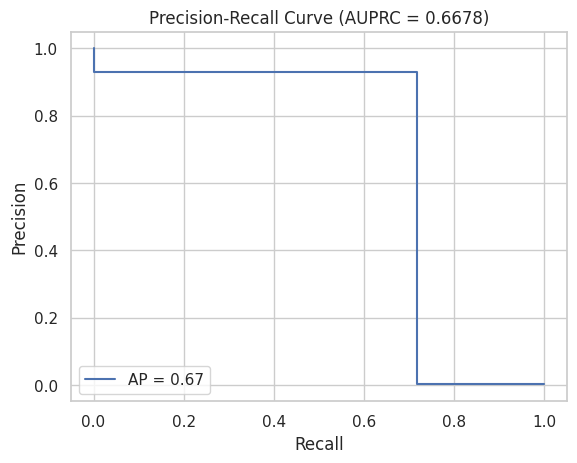

In [ ]:
rfc= RandomForestClassifier(max_depth= None, n_estimators= 500, random_state=42)
lr = LogisticRegression(C= 10, max_iter= 500, n_jobs=-1)
ext= model = ExtraTreesClassifier(max_depth= None, n_estimators= 500)

ec = VotingClassifier(estimators=[
    ('Random Forest', rfc),
    ('Logistic Regression', lr),
    ('Extra Tree', ext),
], voting='soft', weights=[1, 1, 1])

ec.fit(X_train, y_train)
y_pred4 = ec.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy:.4f}")

auprc = average_precision_score(y_test, y_pred4)
print(f"AUPRC: {auprc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred4)

disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=auprc)
disp.plot()
plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.4f})')
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred4)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.72      0.81       113

    accuracy                           1.00     71202
   macro avg       0.97      0.86      0.90     71202
weighted avg       1.00      1.00      1.00     71202



##Training and Evaluation of AdaBoost Classifier Model

Accuracy: 0.9996
AUPRC: 0.7549


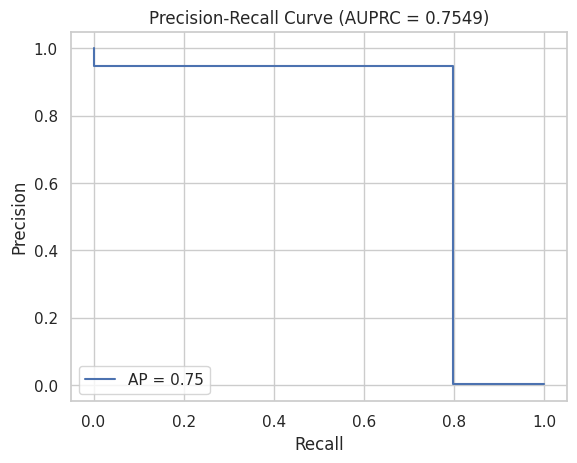

In [ ]:
rfc = RandomForestClassifier(max_depth= None, n_estimators= 500, random_state=42)
abc = AdaBoostClassifier(estimator=rfc, n_estimators=100, learning_rate=0.1, random_state=42)

abc.fit(X_train, y_train)
y_pred5 = abc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {accuracy:.4f}")

auprc = average_precision_score(y_test, y_pred5)
print(f"AUPRC: {auprc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred5)

disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=auprc)
disp.plot()
plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.4f})')
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred5)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.95      0.80      0.87       113

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



##Evaluation of XGBoost Classifier Model

Accuracy: 0.9996
AUPRC: 0.7637


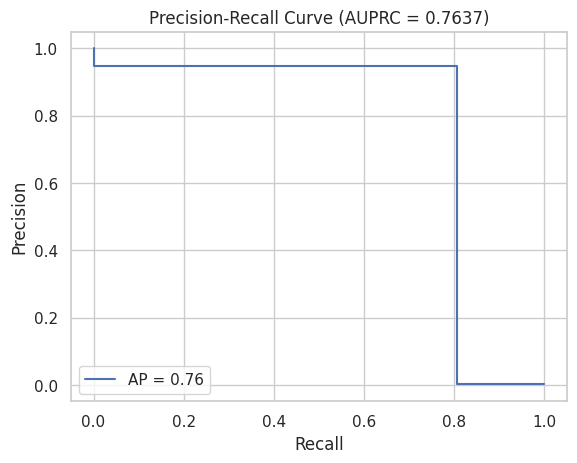

In [ ]:
xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

xgb.fit(X_train, y_train)

y_pred6 = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred6)
print(f"Accuracy: {accuracy:.4f}")

auprc = average_precision_score(y_test, y_pred6)
print(f"AUPRC: {auprc:.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred6)

disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=auprc)
disp.plot()
plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.4f})')
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred6)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.95      0.81      0.87       113

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



#Deep Learning Model

##Deep Neural Network (DNN) Training and Evaluation

In [ ]:
model_dnn = Sequential()

model_dnn.add(Dense(128, input_shape=(30,), activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(256, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(512, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(1024, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(1, activation='sigmoid'))

model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_dnn.summary())

start_time = time.time()

history = model_dnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

training_time = time.time() - start_time
print("\nTraining Time: {:.2f} seconds".format(training_time))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               3968      
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               131584    
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 1024)             

In [ ]:
score = model_dnn.evaluate(X_test, y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.017326852306723595
Test accuracy: 0.9984129667282104


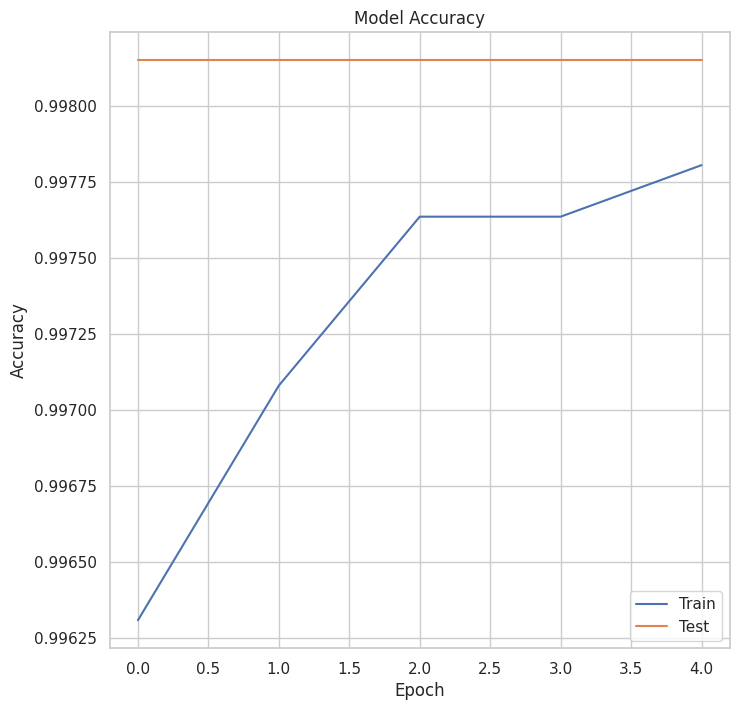

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

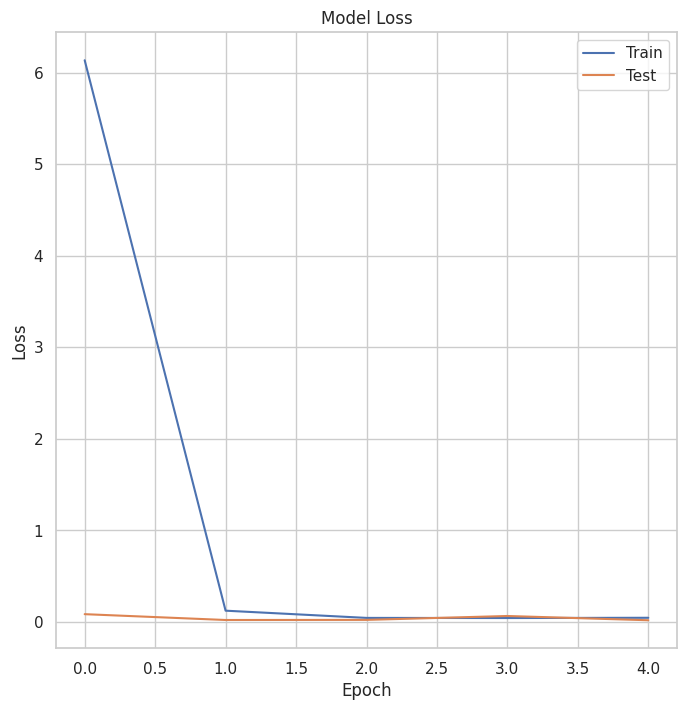

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()